# Programming Exercise 4b: Neural Network Class

In this version of the exercise 4 we will achieve the same objective but implementing a NN class in python.
We will also define a crossvalidation set to check the quality of the model.

In [1]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralNetworkClass import *

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
## NN definition
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9 - output layer

# trying to represent the NN using an array.
# nnDef.shape[0] = number of layers
# nnDef[i] = number of neurons on layer i
nnDef = np.array([input_layer_size, hidden_layer_size, num_labels])

In [3]:
# Loading all data on a dictonary
data = loadmat('ex4data1.mat')

# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()

# m = number of training examples
# n = number of features
(m,n) = X.shape

# note that X has mapped "0" to label 10 because Matlab arrays start on 1
# We'll normalize the 10 value back to 0, so it matches the 0 digit
y[y == 10] = 0

## Train the NN

In [8]:
# Initialize the NN
nn=NNClassifier(nnDef, 500, 1)

In [9]:
# Train the NN
nn.fit(X,y)
# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(nn.cost))

C:\Users\conrado.camacho\OneDrive\Personal Projects\Coursera - Machine Learning Andrew Ng\Python code\neuralNetworkClass.py:122: RuntimeWarning: divide by zero encountered in log
  J = (-1/m)*np.sum((np.multiply(np.log(a[num_layers]), y10) + np.multiply((1 - y10), np.log(1-a[num_layers]))))
C:\Users\conrado.camacho\OneDrive\Personal Projects\Coursera - Machine Learning Andrew Ng\Python code\neuralNetworkClass.py:122: RuntimeWarning: invalid value encountered in multiply
  J = (-1/m)*np.sum((np.multiply(np.log(a[num_layers]), y10) + np.multiply((1 - y10), np.log(1-a[num_layers]))))


Cost at theta found by optimize.minimize: 0.330


In [10]:
pred = nn.predict(X)
print('\nTraining Set Accuracy: {:.2f} %'.format(np.mean(pred == y) * 100))


Training Set Accuracy: 99.40 %


## Evaluate the NN

## Check the cases non predicted properly

In [11]:
Check_cases = 18

# First we identify the cases where the prediction 
# is not correct - misclassified 
misclX = X[pred != y]
correct_label = y[pred != y]
miscl_label = pred[pred !=y]
# miscl_prob = np.amax(Prob[pred !=y], axis=1)

miscl_m = miscl_label.size
print(miscl_m)
# We get a testCases random datapoints. First we get a number of testCases indices out of m
rand_indices = np.random.choice(miscl_m, Check_cases, replace=False)

sel_misclX = misclX[rand_indices, :]
sel_correct_label = correct_label[rand_indices]
sel_miscl_label = miscl_label[rand_indices]
#sel_miscl_prob = miscl_prob[rand_indices, ]

30


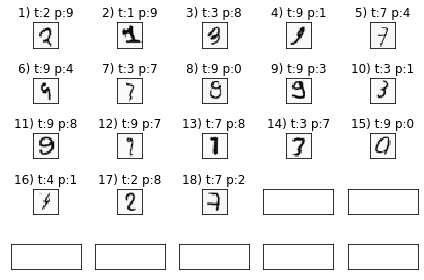

In [12]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(Check_cases):
    img = sel_misclX[i].reshape(20,20).T
    ax[i].imshow(img, cmap = 'Greys', interpolation = 'nearest')
    ax[i].set_title('%d) t:%d p:%d' % (i+1,sel_correct_label[i], sel_miscl_label[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


## Check the cases predicted properly

In [13]:
Check_cases = 25

# First we identify the cases where the prediction 
# is not correct - misclassified 
misclX = X[pred == y]
correct_label = y[pred == y]
miscl_label = pred[pred == y]

miscl_m = miscl_label.size

# We get a testCases random datapoints. First we get a number of testCases indices out of m
rand_indices = np.random.choice(miscl_m, Check_cases, replace=False)

sel_misclX = misclX[rand_indices, :]
sel_correct_label = correct_label[rand_indices]

sel_miscl_label = miscl_label[rand_indices]

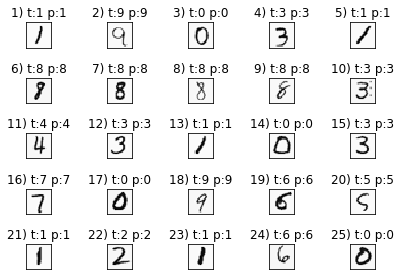

In [14]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(Check_cases):
    img = sel_misclX[i].reshape(20,20).T
    ax[i].imshow(img, cmap = 'Greys', interpolation = 'nearest')
    ax[i].set_title('%d) t:%d p:%d' % (i+1,sel_correct_label[i], sel_miscl_label[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()